# Identifying Right Music Genre Using MAB

 First, let us import necessary libraries

In [1]:
import gym_bandits
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import random
env = gym.make("BanditTenArmedGaussian-v0")
env.action_space

Discrete(10)

Let us simulate a dataset with 5*10000 as shape where the column is the ad banner type and rows are either 0 or 1 i.e whether the ad has been clicked or not clicked by the user respectively



In [2]:
df = pd.DataFrame()
df['classic'] = np.random.randint(0,2,10000)
df['pop'] = np.random.randint(0,2,10000)
df['jazz'] = np.random.randint(0,2,10000)
df['r&b'] = np.random.randint(0,2,10000)
df['hiphop'] = np.random.randint(0,2,10000)

In [3]:
df.head(10) #보상 출력

,classic,pop,jazz,r&b,hiphop
0,1,1,1,1,1
1,0,1,0,1,0
2,1,0,1,0,1
3,0,0,1,1,0
4,1,1,1,0,1
5,0,1,0,1,0
6,0,0,1,0,0
7,1,0,0,0,1
8,1,0,1,0,1
9,0,0,1,0,1


In [28]:
df2 =df.iloc[0:1000]
df2

,classic,pop,jazz,r&b,hiphop
0,1,1,1,1,1
1,0,1,0,1,0
2,1,0,1,0,1
3,0,0,1,1,0
4,1,1,1,0,1
...,...,...,...,...,...
995,1,0,0,0,1
996,1,0,0,1,0
997,0,0,0,0,0
998,0,0,1,0,0


In [27]:
df2.sum()

classic    516
pop        519
jazz       500
r&b        491
hiphop     501
dtype: int64

First, let us initialize necessary variables

In [18]:
# number of genres
num_genre = 5

# number of iterations
no_of_iterations = 1000

# list for storing genre which was selected
genre_selected = []

# count number of times the genre was selected
count = np.zeros(num_genre)

# Q value  #평균보상
Q = np.zeros(num_genre)

# sum of rewards
sum_rewards = np.zeros(num_genre)

 Now we define the softmax exploration

In [19]:
def epsilon_greedy(epsilon):
    
    random_value = np.random.random()
    choose_random = random_value < epsilon
    
    if choose_random:
        action =  np.random.choice(num_genre)
    else:
        action = np.argmax(Q)
    
    return action

In [20]:
for i in range(no_of_iterations):
    
    # select the banner using softmax exploration
    genre =  epsilon_greedy(0.5)
    
    # get the reward
    reward = df.values[i, genre]
           
    # update the selected genre count
    count[genre] += 1
    
    # sum the rewards obtained by that genre
    sum_rewards[genre]+=reward
    
    # calculate the Q value of the genre
    Q[genre] = sum_rewards[genre]/count[genre]
    
    genre_selected.append(genre)    
   
print(Q)
print(count)
print(sum_rewards)
#print(genre_selected)

prefer_genre = np.argmax(Q)
if prefer_genre == 0:
    answer = 'classic'
elif prefer_genre == 1:
    answer = 'pop'
elif prefer_genre == 2:
    answer = 'jazz'
elif prefer_genre == 3:
    answer = 'r&b'
elif prefer_genre == 4:
    answer = 'hiphop'

print('사용자에게 추천할 최적의 장르는 {0}이다.'.format(answer))

[0.45054945 0.48031496 0.504      0.45059289 0.51971326]
[ 91. 127. 250. 253. 279.]
[ 41.  61. 126. 114. 145.]
사용자에게 추천할 최적의 장르는 hiphop이다.


We can plot and see which genre gives us most clicks(rewards)

C:\Users\kate1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

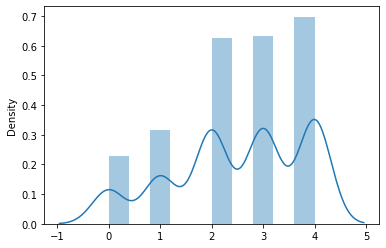

In [21]:
sns.distplot(genre_selected)